 # TP4. Regression on Tabular data
 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split

In [3]:
X = np.arange(-3,8,0.01)

In [4]:
y = X**3 -9*X**2 + 5* X -1 + np.random.normal(0,10, len(X))

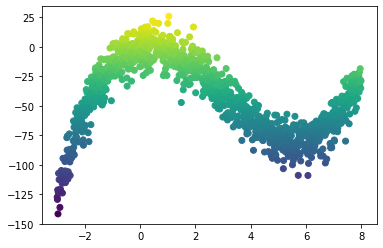

In [5]:
plt.scatter(X,y, c=y)
plt.show()

In [6]:
X[:10]

array([-3.  , -2.99, -2.98, -2.97, -2.96, -2.95, -2.94, -2.93, -2.92,
       -2.91])

In [7]:
X.shape

(1100,)

In [8]:
y[:10]

array([-127.41152703, -129.34118851, -121.29354888, -141.62672697,
       -123.41129098, -107.21875338, -121.44467281, -112.54594205,
       -121.56284001, -121.57021695])

In [9]:
y.shape

(1100,)

**Question 1. Split data into train/test with ratio 2:1 ussing Sklearn train_test_split**

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4)

In [68]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(825, 1) (275, 1) (825, 1) (275, 1)


**Question 2. Train the model with sklearn Linear Regression and predict on train data and draw the curve**

In [54]:
from sklearn.linear_model import LinearRegression

X_train, y_train = X_train.reshape((-1, 1)), y_train.reshape((-1, 1))
X_test, y_test = X_test.reshape((-1, 1)), y_test.reshape((-1, 1))
reg = LinearRegression().fit(X_train, y_train)

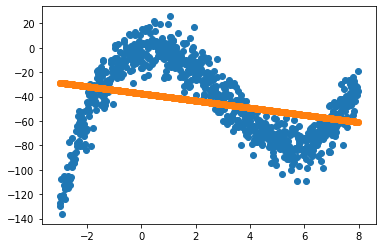

In [55]:
y_train_pred = reg.predict(X_train)
plt.scatter(X_train, y_train)
plt.scatter(X_train,y_train_pred)
plt.show()

**Question 3. Get prediction on test data and draw the curve**

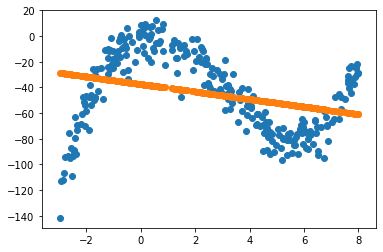

In [58]:
y_test_pred = reg.predict(X_test)

plt.scatter(X_test,y_test)
plt.scatter(X_test,y_test_pred)
plt.show()

**Exercise. Try other models:** 
    - Polynomial, 
    - Ridge, 
    - Lasso, 
    - Support Vector Regressor
    - Decision Tree Regressor
    - Multi-layer Perceptron Regressor (Basic Neural Network)

In [59]:
from sklearn import linear_model

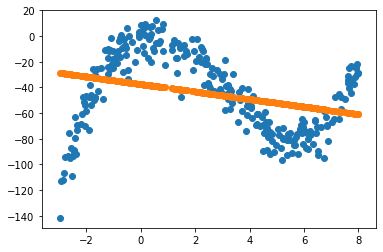

In [60]:
# Ridge
clf = linear_model.Ridge(alpha=0.1)
reg = clf.fit(X_train, y_train)

y_test_pred = reg.predict(X_test)

plt.scatter(X_test,y_test)
plt.scatter(X_test,y_test_pred)
plt.show()

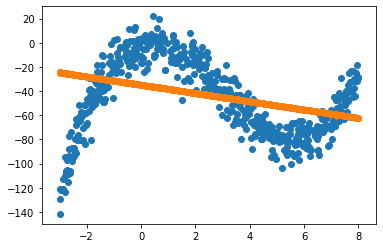

In [47]:
# Lasso
clf = linear_model.Lasso(alpha=0.1)
reg = clf.fit(X_train, y_train)

y_test_pred = reg.predict(X_test)

plt.scatter(X_test,y_test)
plt.scatter(X_test,y_test_pred)
plt.show()

/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


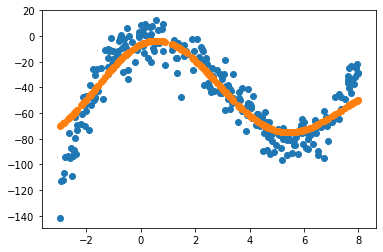

In [62]:
from sklearn import svm
# Support Vector Regressor
clf = svm.SVR(C=1.0, epsilon=0.2)
reg = clf.fit(X_train, y_train)

y_test_pred = reg.predict(X_test)

plt.scatter(X_test,y_test)
plt.scatter(X_test,y_test_pred)
plt.show()

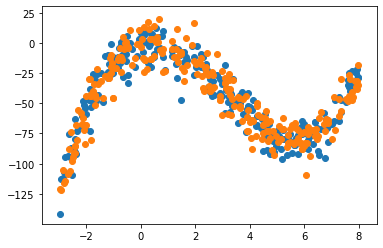

In [65]:
# Decision Tree Regressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, X_train, y_train, cv=10)
reg = regressor.fit(X_train, y_train)

y_test_pred = reg.predict(X_test)

plt.scatter(X_test,y_test)
plt.scatter(X_test,y_test_pred)
plt.show()

/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


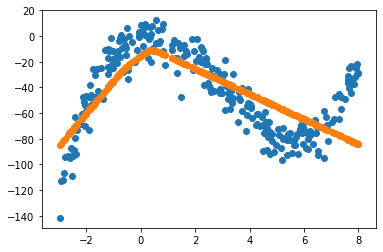

In [74]:
# Multi-layer Perceptron Regressor (Basic Neural Network)
from sklearn.neural_network import MLPRegressor

y_train_1d, y_test_1d = y_train.ravel(), y_test.ravel()

regressor = MLPRegressor(random_state=0, solver='adam', alpha=0.0001, learning_rate_init=0.001)
reg = regressor.fit(X_train, y_train)

y_test_pred = reg.predict(X_test)

plt.scatter(X_test,y_test)
plt.scatter(X_test,y_test_pred)
plt.show()

## FIFA 2019 Dataset

In [12]:
df = pd.read_csv('data/fifa.csv', index_col = 'Unnamed: 0')

In [13]:
df.shape

(18207, 88)

In [14]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Rotate the table for better view

In [15]:
df.head().transpose()

,0,1,2,3,4
ID,158023,20801,190871,193080,192985
Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne
Age,31,33,26,27,27
Photo,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/players/4/19/192985.png
Nationality,Argentina,Portugal,Brazil,Spain,Belgium
...,...,...,...,...,...
GKHandling,11,11,9,85,13
GKKicking,15,15,15,87,5
GKPositioning,14,14,15,88,10
GKReflexes,8,11,11,94,13


list of columns

In [16]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

There are lot of things to clean here. 

- First, remove all rows that contain a NaN value (i.e. remove all players with incomplete data) 

- Remove unecessary columns (any column you don't like), the more information you keep, the better.

- Convert the remaining columns to numeric data (eg. €100k to 100000)

In [75]:
# First clean columns where all value are na to avoid drop all df
df_clean = df.dropna(axis=1, how='any')
df_clean

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club Logo,Value,Wage,Special
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281
...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,1307
18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,https://cdn.sofifa.org/teams/2/light/703.png,€60K,€1K,1098
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,https://cdn.sofifa.org/teams/2/light/1944.png,€60K,€1K,1189
18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,https://cdn.sofifa.org/teams/2/light/15048.png,€60K,€1K,1228


In [77]:
# Then remove columns we don't want
#df_clean = df_clean.drop(columns=['Name', 'Nationality', 'Flag', 'Photo', 'Club', 'Club Logo', 'Work Rate', 'Body Type','Joined', 'Preferred Foot'])
df_clean = df_clean.drop(columns=['Name', 'Nationality', 'Flag', 'Photo', 'Club Logo'])
print(df_clean)

KeyError: "['Name' 'Nationality' 'Flag' 'Photo' 'Club Logo'] not found in axis"

In [78]:
# Clean value money format
df_clean['Value'] = df_clean.Value.replace(regex={'[€]': '', '\.': '', '[M]': '000000', '[K]': '000'})
# Clean wage money format
df_clean['Wage'] = df_clean.Wage.replace(regex={'[€]': '', '\.': '', '[M]': '000000', '[K]': '000'})
# Clean release clause money format
#df_clean['Release Clause'] = df_clean['Release Clause'].replace(regex={'[€]': '', '\.': '', '[M]': '000000', '[K]': '000'})

df_clean
df_clean_saved = df_clean

In [79]:
for y in df_clean.columns:
    if not (df_clean[y].dtype == np.float64 or df_clean[y].dtype == np.int64):
        try:
            df_clean[y] = pd.to_numeric(df_clean[y])
            print(f'{y} column type has been changed to {df_clean[y].dtype}')
        except ValueError as e:
            # Drop column that could not be parse
            df_clean = df_clean.drop(columns=[y])
            print('error: ', e)
            print(f'{y} columns has been removed')
            
print(df_clean.columns)

Value column type has been changed to int64
Wage column type has been changed to int64
Index(['ID', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special'], dtype='object')


**Problem 1. Use 'Value' as the label Y, use the rest information to predict the Value of a player, using Sklearn**

In [96]:
Y = df_clean.Value
X = df_clean.drop(['Value'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X.values, Y.values, test_size=0.33)
print('train data:\t', x_train.shape, y_train.shape)
print('test data:\t', x_test.shape, y_test.shape)

train data:	 (12198, 6) (12198,)
test data:	 (6009, 6) (6009,)


In [91]:
y_train, y_test = y_train.reshape((-6,6)), y_test.reshape((-6,6))

ValueError: cannot reshape array of size 6009 into shape (6)

In [98]:
X_train, X_test = X_train[:,0], X_test[:,0]

In [101]:
X_train, y_train = X_train.reshape((-1, 1)), y_train.reshape((-1, 1))
X_test, y_test = X_test.reshape((-1, 1)), y_test.reshape((-1, 1))

In [102]:
print('train data:\t', X_train.shape, y_train.shape)
print('test data:\t', X_test.shape, y_test.shape)

train data:	 (12198, 1) (12198, 1)
test data:	 (6009, 1) (6009, 1)


/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


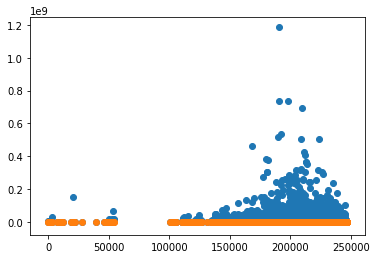

In [103]:
from sklearn import svm
# Support Vector Regressor
clf = svm.SVR(C=1.0, epsilon=0.2)
reg = clf.fit(X_train, y_train)

y_test_pred = reg.predict(X_test)

plt.scatter(X_test,y_test)
plt.scatter(X_test,y_test_pred)
plt.show()

**Question 2: Use 'Overrall' as the label Y, use the rest information (except Potential) to predict the Overall rating of a player, using Sklearn**

In [105]:
Y = df_clean.Overall
X = df_clean.drop(['Potential'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X.values, Y.values, test_size=0.33)

X_train, X_test = X_train[:,0], X_test[:,0]

X_train, y_train = X_train.reshape((-1, 1)), y_train.reshape((-1, 1))
X_test, y_test = X_test.reshape((-1, 1)), y_test.reshape((-1, 1))

print('train data:\t', X_train.shape, y_train.shape)
print('test data:\t', X_test.shape, y_test.shape)

train data:	 (12198, 1) (12198, 1)
test data:	 (6009, 1) (6009, 1)


/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


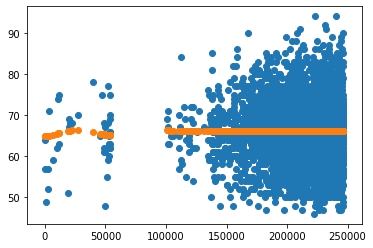

In [106]:
from sklearn import svm
# Support Vector Regressor
clf = svm.SVR(C=1.0, epsilon=0.2)
reg = clf.fit(X_train, y_train)

y_test_pred = reg.predict(X_test)

plt.scatter(X_test,y_test)
plt.scatter(X_test,y_test_pred)
plt.show()